In [2]:
# ------------------------------------------------------------------
# Filename:    linear_regression_1.py
# ------------------------------------------------------------------
# File description:
# Python and TensorFlow simple linear regression.
# ------------------------------------------------------------------

# ------------------------------------------------------
# Modules to import
# ------------------------------------------------------

import tensorflow as tf
import time
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# ------------------------------------------------------
# Global variables
# ------------------------------------------------------

dataset = [[0, 11], [0, 8], [10, 20], [10, 23],
           [2, 12], [4, 10], [8, 15], [9, 19],
           [5, 11], [5, 10], [6, 14], [7, 15]
           ]

no_of_epochs = 1000


# ---------------------------------------------------------------
# def train_the_model(x, y)
# ---------------------------------------------------------------

def train_the_model(x, y):

    print('-- Train the model')

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(1, input_dim=1))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    model.fit(x, y, epochs=no_of_epochs, verbose=0)

    print(model.summary())

    return model


# ---------------------------------------------------------------
# def predict_from_model(model, to_predict)
# ---------------------------------------------------------------

def predict_from_model(model, to_predict):

    print('-- Predict from the trained model')

    predictions = model.predict(to_predict)
    weights = model.get_weights()

    return predictions, weights


# ---------------------------------------------------------------
# def display_details(weights, to_predict, predictions)
# ---------------------------------------------------------------

def display_details(weights, to_predict, predictions):

    print('-- Display details')

    a0 = weights[0]
    b0 = weights[1]

    a = a0[0, 0]
    b = b0[0]

    print('---------------------------------------------------')
    print(weights)

    print('-- a = ' + str(a))
    print('-- b = ' + str(b))

    if a == 0.0:
        a_print = ''
    else:
        a_print = str('%.3f' % a)

    if b == 0.0:
        b_print = ''
    elif b < 0.0:
        b_print = str(' - %.3f' % tf.math.abs(b))
    else:
        b_print = str(' + %.3f' % b)

    print('-- Simple linear equation estimation --------------')
    print('-- Equation is y = ' + a_print + b_print)
    print('---------------------------------------------------')

    print('-- Predicted values of y --------------------------')
    print('x = ' + str(to_predict))
    print('')
    print('y = ' + str(predictions))
    print('---------------------------------------------------')


# ---------------------------------------------------------------
# def plot_data(x, y, weights, to_predict, predictions)
# ---------------------------------------------------------------

def plot_data(x, y, weights, to_predict, predictions):

    print('-- Plot the data')

    a = weights[0][0, 0]
    b = weights[1][0]

    x_predictions = np.arange(
        x[tf.argmin(x)],
        x[tf.argmax(x)],
        0.001)

    y_predictions = tf.math.add(tf.math.multiply(a, x_predictions), b)

    plt.plot(x, y, 'ro')
    plt.plot(x_predictions, y_predictions, 'g')
    plt.plot(to_predict, predictions, 'b*')
    plt.grid()
    plt.title('Simple linear regression in Python and TensorFlow')
    plt.xlabel('x data')
    plt.ylabel('y data')
    plt.show()


# ------------------------------------------------------
# def main()
# ------------------------------------------------------


# ------------------------------------------------------
# -- Start of script run actions
# ------------------------------------------------------

print('----------------------------------------------------')
print('-- Start script run ' + str(time.strftime('%c')))
print('----------------------------------------------------\n')
print('-- Python version     : ' + str(sys.version))
print('-- NumPy version      : ' + str(np.__version__))
print('-- TensorFlow version : ' + str(tf.__version__))
print('-- Matplotlib version : ' + str(mpl.__version__))


----------------------------------------------------
-- Start script run Wed May  5 18:30:32 2021
----------------------------------------------------

-- Python version     : 3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)]
-- NumPy version      : 1.19.5
-- TensorFlow version : 2.4.1
-- Matplotlib version : 3.4.1


In [18]:

# ------------------------------------------------------
# -- Main script run actions
# ------------------------------------------------------


training_data = dataset

x = [row[0] for row in training_data]
y = [row[1] for row in training_data]

In [19]:
model = train_the_model(x, y)

-- Train the model
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


-- Predict from the trained model
-- Training dataset --------------------------
[[0, 11], [0, 8], [10, 20], [10, 23], [2, 12], [4, 10], [8, 15], [9, 19], [5, 11], [5, 10], [6, 14], [7, 15]]
-- x -----------------------------------------
[0, 0, 10, 10, 2, 4, 8, 9, 5, 5, 6, 7]
-- y -----------------------------------------
[11, 8, 20, 23, 12, 10, 15, 19, 11, 10, 14, 15]
-- Model and predictions ---------------------
-- Display details
---------------------------------------------------
[array([[1.1359193]], dtype=float32), array([7.7432566], dtype=float32)]
-- a = 1.1359193
-- b = 7.7432566
-- Simple linear equation estimation --------------
-- Equation is y = 1.136 + 7.743
---------------------------------------------------
-- Predicted values of y --------------------------
x = [10 11 12 13]

y = [[19.102451]
 [20.238369]
 [21.374289]
 [22.510208]]
---------------------------------------------------
----------------------------------------------
-- Plot the data


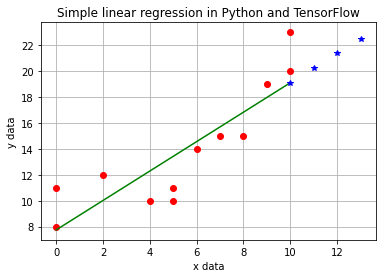

In [20]:
to_predict = np.array([10, 11, 12, 13])
predictions, weights = predict_from_model(model, to_predict)

print('-- Training dataset --------------------------')
print(training_data)
print('-- x -----------------------------------------')
print(x)
print('-- y -----------------------------------------')
print(y)
print('-- Model and predictions ---------------------')
display_details(weights, to_predict, predictions)
print('----------------------------------------------')

plot_data(x, y, weights, to_predict, predictions)

In [21]:
# ------------------------------------------------------
# -- End of script run actions
# ------------------------------------------------------

print('----------------------------------------------------')
print('-- End script run ' + str(time.strftime('%c')))
print('----------------------------------------------------\n')


----------------------------------------------------
-- End script run Wed May  5 18:30:44 2021
----------------------------------------------------

